#Plot of absolute flux lost during transit

Discussing improvements to the paper with Pete

* "Absolute flux" version of the 4 panel plot to highlight the impact of moving through the stellar line profile
* Literature review again - check exactly what it was the Geneva paper (and others) say about the depth of the line profile in relation to atmosphere planetary depth
* New "plot 1" possibly including the transit schematic. How does the illumination of the planet change as a function of time. Also split by hemisphere.

# Setup

In [1]:
%load_ext autoreload
%autoreload 1
%aimport two_sides_figure
%aimport elements_model3d
%aimport model3d

pf = two_sides_figure
m3d = elements_model3d
old_m3d = model3d


import os
import pickle
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt


dir = 'everything/'
files = os.listdir(dir)

sodium_d = [5889.950,5895.924]

time = []
wvl = []
spectra = []
spectra_errors = []
spectra2 = []
spectra_errors2 = []

min_wvl = 5869
max_wvl = 5909

for f in files:
  time += [float(f[:-3])]
  data = pickle.load(open(dir+f,'rb'))
  index = [(data['wvl'] > min_wvl) & (data['wvl'] < max_wvl)]

  wvl += [data['wvl'][index]]
  spectra += [data['spec'][index]]
  spectra_errors += [data['spec_error'][index]]

wvl = wvl[0]
time = np.array(time)
spectra = np.array(spectra)
spectra_errors = np.array(spectra_errors)

planet_K = 154
sodium_d = [5889.950,5895.924]
midtransit = 54341.056842
period =  2.21857312
planet_K = 154
star_K = 0.20196
line_centers = sodium_d
plotting = False
nproc = 24
best_fit=False
save_star = False

i1 = 9
i2 = 29


spectra = spectra[np.argsort(time)]
spectra = spectra[np.arange(i1,i2)]

spectra_errors = spectra_errors[np.argsort(time)]
spectra_errors = spectra_errors[np.arange(i1,i2)]

time = time[np.argsort(time)]
time = time[np.arange(i1,i2)]

new_errors = np.array([np.std(spectra, axis=0)]*20)

spectra_errors = new_errors

load = True
save = True
save_m1 = 'test1.p'
save_m2 = 'test2.p'

/home/toml/Python/pysynphot/locations.py:14: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/home/toml/Python/pysynphot/locations.py:74: UserWarning: Extinction files should be moved to $PYSYN_CDBS/extinction for compatibility with future versions of pysynphot.
  warnings.warn('Extinction files should be moved to '
/home/toml/Python/pysynphot/locations.py:110: UserWarning: Extinction files not found in grid/extinction
  warnings.warn('Extinction files not found in %s' % (extdir,))
/home/toml/Python/pysynphot/locations.py:88: UserWarning: PYSYN_CDBS is undefined; cannot find mtab/*_tmg.fits file
  warnings.warn("PYSYN_CDBS is undefined; cannot find %s file" % template)
/home/toml/Python/pysynphot/locations.py:88: UserWarning: PYSYN_CDBS is undefined; cannot find mtab/*_tmc.fits file
  warnings.warn("PYSYN_CDBS is undefined; cannot find %s file" % template)
/home/toml/Python/pysynph

In [3]:
x1 = [0.51374991, 0.18869174, 8.5049162065200008, -0.15442891679199999,  0.23553298503299999, 0.063145416345300007, -3.50757872893e+50, 111.002838225]

In [3]:
full_model = old_m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=3.1)

In [4]:
import astropy.constants as const

c = const.c.value/1000

star_vel = -2.3

delta_wvl = wvl
star_sodium1 = sodium_d[0]

star_sodium1 += star_vel*sodium_d[0]/c

delta_wvl = wvl - star_sodium1

v = c*delta_wvl/wvl

star_sodium2 = sodium_d[1]

star_sodium2 += star_vel*sodium_d[1]/c

delta_wvl2 = wvl - star_sodium2

v2 = c*delta_wvl2/wvl
master_dat = np.loadtxt('sodium_spectrum.dat')
master_wvl = master_dat[:,0]
master_flux = master_dat[:,1]

master_flux = master_flux/np.median(master_flux)

delta_wvlm = master_wvl - star_sodium1
vm = c*delta_wvlm/master_wvl

delta_wvlm2 = master_wvl - star_sodium2
vm2 = c*delta_wvlm2/master_wvl

In [5]:
master_dat = np.loadtxt('sodium_spectrum.dat')
master_wvl = master_dat[:,0]
master_flux = master_dat[:,1]

master_flux = master_flux/np.median(master_flux)

delta_wvlm = master_wvl - star_sodium1
vm = c*delta_wvlm/master_wvl

delta_wvlm2 = master_wvl - star_sodium2
vm2 = c*delta_wvlm2/master_wvl

In [6]:
midtransit = 54341.056842
period =  2.21857312
planet_K = 154

vel_model = -1*1000*planet_K*np.sin(2.0*np.pi*(midtransit-time)/period)


In [7]:
from spec_manip import align_spectra
from plot_spectrum import bin_curve

scale = np.sqrt(3.0)
resamp_factor = 10

alligned = align_spectra(wvl,spectra.copy(),vel_model)

bin_wvl, bin_alligned, bin_alligned_error = bin_curve(wvl,np.median(alligned,axis=0),scale*np.std(alligned,axis=0)/np.sqrt(len(spectra)),resamp_factor)

alligned_model = align_spectra(wvl,full_model.copy(),vel_model)

alligned_profile = np.mean(alligned_model,axis=0)


In [8]:
star_sodium = sodium_d[0]
star_sodium += star_vel*sodium_d[0]/c
delta_wvl = bin_wvl - star_sodium

bin_v = c*delta_wvl/bin_wvl

star_sodium2 = sodium_d[1]
star_sodium2 += star_vel*sodium_d[1]/c
delta_wvl2 = bin_wvl - star_sodium2

bin_v2 = c*delta_wvl2/bin_wvl

# Absolute flux version of panel 4 

In [9]:
star_vsini = 0.0

absolute = True

full_model_noRM = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='full',absolute=absolute)

model_left_noRM = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='left',absolute=absolute)

model_right_noRM = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='right',absolute=absolute)

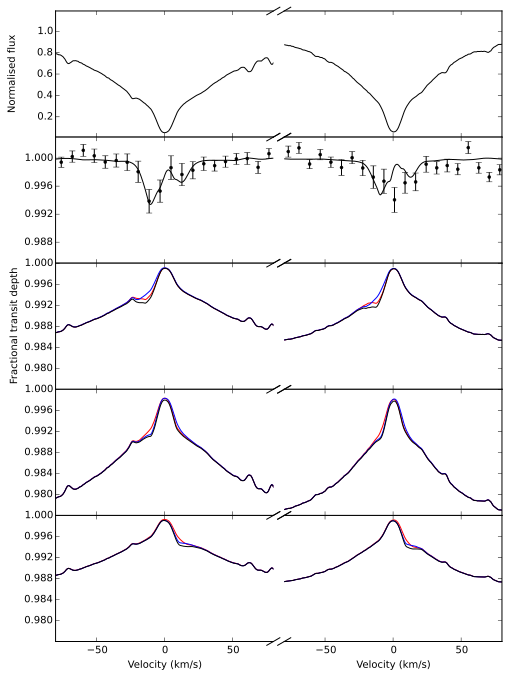

In [18]:
fig, ax = plt.subplots(5,2,sharex=True)
fig.set_size_inches(8, 11.3)

fig.subplots_adjust(hspace=0,wspace=0.05)

ax = ax.reshape(-1)

ax[0].plot(vm,master_flux,'k')
ax[1].plot(vm2,master_flux,'k')

left_side  = (wvl > 5888) & (wvl < 5892)
right_side  = (wvl > 5894) & (wvl < 5898)

ax[2].plot(v,alligned_profile,'k',label='combined')
ax[2].errorbar(bin_v,bin_alligned,yerr=bin_alligned_error,fmt='k.')

ax[3].plot(v2,alligned_profile,'k',label='combined')
ax[3].errorbar(bin_v2,bin_alligned,yerr=bin_alligned_error,fmt='k.')

frames = [3,10,16]

for i in range(4,10):

    # sort out the LEFT hand side of the plots
    if i % 2 == 0:
        frame_no = frames[i/2-2]
        ax[i].plot(v[left_side],model_left_noRM[frame_no][left_side],ls='-',color=(1,0,0),label='left limb')
        ax[i].plot(v[left_side],model_right_noRM[frame_no][left_side],ls='-',color=(0,0,1),label='right limb')
        ax[i].plot(v[left_side],full_model_noRM[frame_no][left_side],'k',label='full')

    else:
        frame_no = frames[i/2-2]
        ax[i].plot(v2[right_side],model_left_noRM[frame_no][right_side],ls='-',color=(1,0,0),label='left limb')
        ax[i].plot(v2[right_side],model_right_noRM[frame_no][right_side],ls='-',color=(0,0,1),label='right limb')
        ax[i].plot(v2[right_side],full_model_noRM[frame_no][right_side],'k',label='full')

for i in range(0,2):
    ax[i].set_ylim(0.01,1.19)        
        
for i in range(2,4):
    ax[i].set_ylim(0.985,1.003)
    ax[i].set_yticks([0.988,0.992,0.996,1.000])

for i in range(4,10):
    ax[i].set_ylim(0.976,1.00)
    ax[i].set_yticks([0.980,0.984,0.988,0.992,0.996,1.0])
        
d = .03
for i in range(0,10):

    kwargs = dict(transform=ax[i].transAxes, color='k', clip_on=False)
    if i % 2 == 0:
        ax[i].spines['right'].set_visible(False)
        ax[i].tick_params(right='off')
        ax[i].plot((1-d,1+d),(-d,+d), **kwargs)
        ax[i].plot((1-d,1+d),(1-d,1+d), **kwargs)

        
    else:
        ax[i].spines['left'].set_visible(False)
        ax[i].tick_params(labelleft='off',left='off')
        ax[i].plot((-d,+d),(-d,+d), **kwargs)
        ax[i].plot((-d,+d),(1-d,1+d), **kwargs)

    ax[i].set_xlim(-80,80)
    ax[i].set_xticks([-50,0,50])
        
    
    
ax[8].set_xlabel('Velocity (km/s)')
ax[9].set_xlabel('Velocity (km/s)')

ax[4].set_ylabel('Fractional transit depth')

ax[0].set_ylabel('Normalised flux',labelpad=20)

plt.savefig('Model_multi_panel_vel_alligned.pdf')
plt.show()

Note, only the last three panels here have been modified. It seems to me that due to there being much less flux at the core of the line, the actual observed signal strength is as high, if not higher in the ingress and egress phases as it is in the center of transit, despite the center of transit having the highest 'relative signal'. Pehaps a useful comparison would be the difference between the left and right hand sides (add/subtract) to see what the absolute signal looks like for two halves?

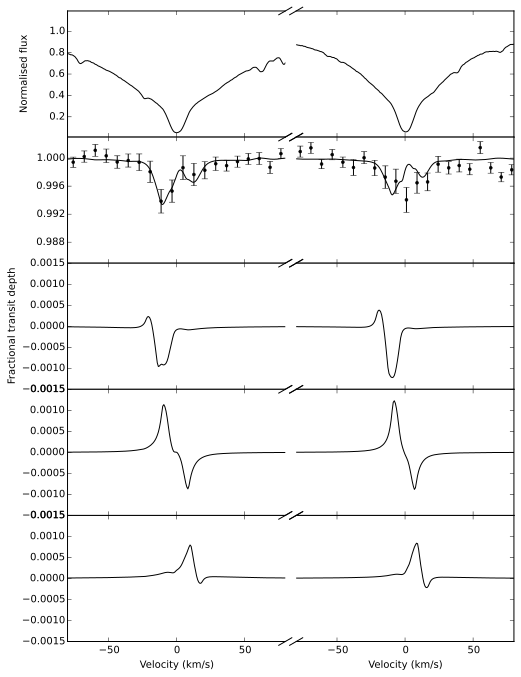

In [28]:
fig, ax = plt.subplots(5,2,sharex=True)
fig.set_size_inches(8, 11.3)

fig.subplots_adjust(hspace=0,wspace=0.05)

ax = ax.reshape(-1)

ax[0].plot(vm,master_flux,'k')
ax[1].plot(vm2,master_flux,'k')

left_side  = (wvl > 5888) & (wvl < 5892)
right_side  = (wvl > 5894) & (wvl < 5898)

ax[2].plot(v,alligned_profile,'k',label='combined')
ax[2].errorbar(bin_v,bin_alligned,yerr=bin_alligned_error,fmt='k.')

ax[3].plot(v2,alligned_profile,'k',label='combined')
ax[3].errorbar(bin_v2,bin_alligned,yerr=bin_alligned_error,fmt='k.')

frames = [3,10,16]

for i in range(4,10):

    # sort out the LEFT hand side of the plots
    if i % 2 == 0:
        frame_no = frames[i/2-2]
        ax[i].plot(v[left_side],model_left_noRM[frame_no][left_side] - model_right_noRM[frame_no][left_side],'k',label='full')

    else:
        frame_no = frames[i/2-2]
        ax[i].plot(v2[right_side],model_left_noRM[frame_no][right_side]-model_right_noRM[frame_no][right_side],'k',label='full')

for i in range(0,2):
    ax[i].set_ylim(0.01,1.19)        
        
for i in range(2,4):
    ax[i].set_ylim(0.985,1.003)
    ax[i].set_yticks([0.988,0.992,0.996,1.000])

for i in range(4,10):
    ax[i].set_ylim(-0.0015,0.0015)
#    ax[i].set_yticks([0.980,0.984,0.988,0.992,0.996,1.0])
        
d = .03
for i in range(0,10):

    kwargs = dict(transform=ax[i].transAxes, color='k', clip_on=False)
    if i % 2 == 0:
        ax[i].spines['right'].set_visible(False)
        ax[i].tick_params(right='off')
        ax[i].plot((1-d,1+d),(-d,+d), **kwargs)
        ax[i].plot((1-d,1+d),(1-d,1+d), **kwargs)

        
    else:
        ax[i].spines['left'].set_visible(False)
        ax[i].tick_params(labelleft='off',left='off')
        ax[i].plot((-d,+d),(-d,+d), **kwargs)
        ax[i].plot((-d,+d),(1-d,1+d), **kwargs)

    ax[i].set_xlim(-80,80)
    ax[i].set_xticks([-50,0,50])
        
    
    
ax[8].set_xlabel('Velocity (km/s)')
ax[9].set_xlabel('Velocity (km/s)')

ax[4].set_ylabel('Fractional transit depth')

ax[0].set_ylabel('Normalised flux',labelpad=20)

plt.savefig('Model_multi_panel_vel_alligned.pdf')
plt.show()

So that's nice, the number of photons blocked actually stays roughly constant with phase. Means we should get power from all phases. Neat.